<h1 style='color:red' > Dynamic Typing and Shared Preference </h1>

- dynamic typing and the polymorphism implies the conciseness and flexibility of the Python language.
- as we know that in Python...
    - we do not declare the specific types of the objects in our code.
    - therefor they are naturally applicable in more contexts than we can sometimes even plan ahead for.
    - in this way dynamic typing is the root of flexibility in python.
- as we know that in Python...
    - the meaning of an operation depends on the objects being operated on.
    - the plus sign (+) means different things for different objects: addition for numbers, and concatenation for strings.
    - This property of Python is  called as a polymorphism.
    - due to polymorphism python provides conciseness.

* **Variable creation**
    - we never declare variables ahead of time in python.
    - in python variable (name) like `a` is created when your code first assigns it a value.
    - Future assignments change the value of the already created name. 
    - Ex. -  we run an assignment statement such as a = 3 it works even if we’ve never told Python to use the name `a` as a variable before **( in programming language such as C, C++, java we need to declare variable before it's assignment and we also need to declare it's datatype )**
* **Variable types**
    - in python variable never has any type information or constraints associated with it.
    - The notion of type lives with objects not names.
    - Variables are generic in nature.
    - they always simply refer to a particular object at a particular point in time in python.
* **Variable use**
    - When a variable appears in an expression it is immediately replaced with the object that it currently refers to.
    - Further, all variables must be explicitly assigned before they can be used.
    - referencing unassigned variables results in errors.

<h4 style='color:blue' > When we type a = 3 in an interactive session or program file...how does Python know that `a` should stand for an integer?

- when we write `a = 3` python follows a below steps..

1. Create an object to represent the value 3.
- objects have more structure than just enough space to represent their values.
    - Each object also has two standard header fields...
        - type designator used to  mark the type of the object
        - a reference counter used to determine reclaimation of the object.
2. Create the variable a, if it does not yet exist.
3. Link the variable a to the new object 3.

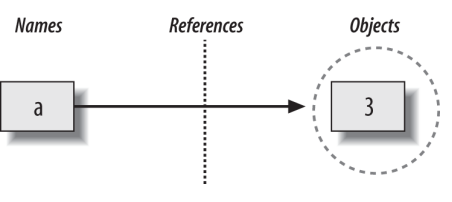

-  links from variables to objects are called `references` in Python.
- after running the assignment a = 3 Variable `a` becomes a reference to the object 3.
- Internally the variable is a pointer to the object’s memory space created by running the literal expression 3.

<h2 style='color:green' > Termolgies in interpreter design </h2>

- Variables are Names(entries) in a system table with blank spaces for links to objects.
- Objects are pieces of allocated memory to represent the values for which they stand.
- References are pointers of objects to variables.

- each time we generate a new value in our code by running an expression Python creates a new object (chunk of memory) to represent that value.
- <span style='color:red' > As an optimization Python internally caches and reuses certain kinds of unchangeable(immutable) objects such as small integers and strings. </span>

<h2 style='color:green' > Types Live with Objects, Not Variables </h2>

- unlike other programming language...in python type lives with object in python not in variable.
- type of objects are determined automatically at runtime, not in response to declarations in your code.
- here...A starts out as an integer, then becomes a string, and finally becomes a floating-point number. 
- the reason behind this is...
    - variable in Python is that it references a particular object at a particular point in time.
    - in broad terms names(variables) are just generic references to objects.
    - Objects on the other hand, know what type they are—each object contains a header field that tags the object with its type. The integer object 3, for example, will contain the value 3, plus a designator that tells Python that the object is an integer. designator of the 'spam' string object points to the string type (called str) instead.this way python provides a dynamic data typing.

In [1]:
A = 3 # It's an integer
A = 'spam' # Now it's a string
A = 1.23 # Now it's a floating point

<h2 style='color:green' > Objects Are Garbage-Collected </h2>

- In the prior section we assigned the variable a to different types of objects in each assignment. 
- But when we reassign a variable, what happens to the value it was previously referencing? 
- For example, after the following statements, what happens to the object 3?

In [2]:
a = 3
a = 'spam'

- The answer is that in Python, whenever a name is assigned to a new object, the space held by the prior object is reclaimed if it is not referenced by any other name or object. This automatic reclamation of objects’ space is known as `garbage collection`.
- component named `Garbage collector` responsible for the garbage collection in python.  
- consider the following example to understand this concept properly...

In [3]:
x = 42
x = 'shrubbery' # Reclaim 42 now (unless referenced elsewhere)
x = 3.1415 # Reclaim 'shrubbery' now
x = [1, 2, 3] # Reclaim 3.1415 now

- Each time x is assigned to a new object, Python reclaims the prior object’s space.
- For instance, when it is assigned the string 'shrubbery', the object 42 is immediately reclaimed (assuming it is not referenced anywhere else).
- reclaimed object’s space is automatically thrown back into the free space pool to be reused for a future object.

- Internally garbage collector performs this task using reference counter present in every object that keeps track of the number of references currently pointing to that object.
- when we assign a new raference of a any object to the variable, raference counter of that object is incremented by 1.
- also when variable stops refering an object,  raference counter of that object is decremented by 1.
- As soon as (and exactly when) this counter drops to zero the object’s memory space is automatically reclaimed.
- benefit of garbage collection is that it we can use objects liberally without ever needing to allocate or free up space in our script. Python automatically clean up unused space for you as your program runs.
- <span style='color:red' > As an optimization Python internally caches and reuses certain kinds of unchangeable(immutable) objects such as small integers and strings instead of reclaming them. </span>

<h2 style='color:green' > Cyclic referernce Garbage-Collection </h2>

- Python’s garbage collection also has a component that detects and reclaims objects with cyclic references in time.
- This component can be disabled if you’re sure that your code doesn’t create cycles, but it is enabled by default.

- Circular references are a classic issue in reference count garbage collectors.
- Because references are implemented as a pointers, it’s possible for an object to reference itself, or reference another object that does.

In [4]:
# Example of circular refference
L = [1,2,3]   
L.append(L)
L

[1, 2, 3, [...]]

In [5]:
# another Example is...
L = [1,2,3]
B = [4,5,6,L]
L.extend(B)
L

[1, 2, 3, 4, 5, 6, [...]]

<h2 style='color:blue' > Shared References </h2>

- shared reference means...more than one variables are reffering the same object at same time.
- For Ex. -

In [6]:
a = 3
b = a

- The second command causes Python to create the variable b.
- the variable a is being used and not assigned here yet...
    - so firstly object for value 3 ias created and  variable `a` is replaced with the object it references (3).
    - then b is made to reference that object.
- The net effect is that the variables a and b wind up referencing the same object.
- this is called as a shared reference.

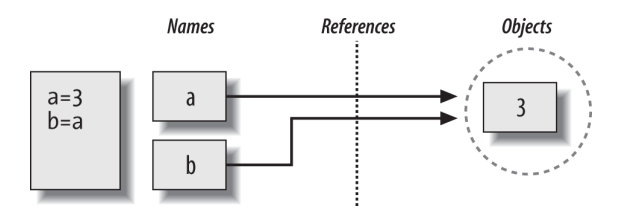

- with multiple names referencing the same object—is usually called a shared reference (and sometimes just a shared object) in Python.
- Note that the names a and b are not linked to each other directly when this happens.
- there is no way to ever link a variable to another variable in Python.
- here... both variables just point to the same object via their references but not linked with each other.

In [7]:
# suppose we extend the session with one more statement
a = 3
b = a
a = 'spam'

- As with all Python assignments, this statement simply makes a new object to represent the string value 'spam' and sets a to reference this new object.
- however, It does not change the value of b. b still references the original object, the integer 3 as it is not an inplace operation and int are numbers are immutable in nature.
- now you think that if number is innutable then why reference of variable `a` changed?
- it's because it is assigned to new value and as rules of variable creation Future assignments change the value of the already created name. but `b` is not assigned here so we can't change it as numbers are immutable. 

In [8]:
# we can't able to perform inplace operations on immutable types as it cat't be modified.

In [9]:
a = 3
b = a
a = a + 2
a,b

(5, 3)

- in this case many thinks that it is a inplace operation but it is not.
- here python creates a new object for result a = 5 and starts referening that instead modifing object 3 and making it 5. 
- so in this case `a` stops refering object 3 but `b` still refereing the object 3 and also `b` is not assigned yet here so we can't change it as numbers are immutable.

**Shared References and In-Place Changes**

- there are objects and operations that perform in-place object changes—Python’s mutable types, including lists, dictionaries, and sets.
- For instance, an assignment to an offset in a list actually changes the list object itself in place, rather than generating a brand-new list object.
- For objects that support such in-place changes, we need to be more aware of shared references since a change from one name may impact others.

To illustrate this let's take another Example...

In [10]:
L1 = [2, 3, 4]
L2 = L1

- L1 here is a list containing the objects 2, 3, and 4.
- Items inside a list are accessed by their positions.
- so L1[0] refers to object 2, the first item in the list L1.
- lists are also objects in their own right just like integers and strings so After running the two prior assignments, L1 and L2 reference the same shared object.

- now let's change the first element of list l1.

In [11]:
L1 = [2, 3, 4] # A mutable object
L2 = L1 # Make a reference to the same object
L2[0] = 24 # An in-place change
L2 # L1 is different

[24, 3, 4]

In [12]:
L1

[24, 3, 4]

- Really, we haven’t changed L1 itself here; we’ve changed a component of the object that L2 references.
- This sort of change overwrites part of the list object’s value in place.
- Because the list object is shared by (referenced from) other variables, though, an inplace change like this doesn’t affect only L2—that is, you must be aware that when you make such changes, they can impact other parts of your program.
- In this example, the effect shows up in L1 as well because it references the same object as L2.

**Solution**

- This behavior only occurs for mutable objects that support in-place changes.
- if you don’t want such behavior, you can request that Python copy objects instead of making references.
- slicing technique won’t work on the other major mutable core types, dictionaries and sets, because they are not sequences—to copy a dictionary or set, instead use their X.copy() method call.

In [13]:
L1 = [2, 3, 4]
L2 = L1[:] # Make a copy of L1 (or list(L1), copy.copy(L1), etc.)
L1[0] = 24
L1

[24, 3, 4]

In [14]:
L2 # L2 is not changed

[2, 3, 4]

<h2 style='color:blue' > Shared References and Equality </h2>

In [15]:
x = 42
x = 'shrubbery' # Reclaim 42 now?

- Because Python caches and reuses small integers and small strings, as mentioned earlier, the object 42 here is probably not literally reclaimed here... instead, it will likely remain in a system table to be reused the next time you generate a 42 in your code.
- Most of objects are reclaimed immediately when they are no longer referenced; for those that are not, the caching mechanism is irrelevant to your code.
- For instance, because of Python’s reference model, there are two different ways to check for equality in a Python program. Let’s create a shared reference to demonstrate.

In [16]:
L = [1, 2, 3]
M = L # M and L reference the same object
L is M # Same objects

True

- the `==` operator, tests whether the two referenced objects have the same values; this is the method almost always used for equality checks in Python.
- the `is` operator tests for object identity—it returns True only if both names point to the exact same object.

In [17]:
L = [1, 2, 3]
M = [1, 2, 3]

- As we know when we assign a variable every time python creates a new object so here L and M are defferent object with same value.

In [18]:
L == M # Same values

True

In [19]:
L is M # Different objects

False

In [20]:
# Now, watch what happens when we perform the same operations on small numbers.

- when we create a object for such a small immutable object such as int or string so it is stored in chache for further usage. 

In [21]:
X = 42
Y = 42

- here when we create a object 42 for X variable it also stored in chache as well to future uasage and when we try to assgn same value to the  Y variable.python checks for that object in chache first and as it present in chache so,instead of creating the new object python makes Y to refer the same object.
- small integer form range -5 to 256 is able to stored in chache.
- small string lenght 4096 characters without any single space also stored in chache.

In [22]:
X == Y

True

In [23]:
X is Y

True

<h2 style='color:blue' > How to Get Reference counter?

- you can always ask Python how many references there are to an object.
- the getrefcount function in the standard sys module returns the object’s reference count.

In [1]:
import sys
sys.getrefcount(1) # 647 pointers to this shared piece of memory
sys.getrefcount('reshma')

3

<h2 style='color:blue' > “Weak” References

- You may occasionally see the term “weak reference” in the Python world. 
- In short, a weak reference, implemented by the weakref standard library module.
- weak reference is a reference to an object that does not by itself prevent the referenced object from being garbage-collected.
- If the last remaining references to an object are weak references, the object is reclaimed and the weak references to it are automatically deleted.